In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk 

In [2]:
df = pd.read_excel(r"C:\Users\vaish\OneDrive\Desktop\Projects\spam_detection\spam_ham_sms_dataset(1).xlsx")

In [3]:
df.head()

,message_id,sender,message,timestamp,is_spam,category
0,1,AD-JIO-125,Congratulations! You've won a lottery. Click h...,2023-01-01 00:00:00,0.0,Promotional
1,2,AD-BANK-350,You have a new voicemail. Check now.,2023-01-01 01:00:00,0.0,Promotional
2,3,AD-WINZO-242,Congratulations! You've won a lottery. Click h...,2023-01-01 02:00:00,0.0,Promotional
3,4,AD-JIO-792,You have a new voicemail. Check now.,2023-01-01 03:00:00,1.0,Promotional
4,5,AD-INFO-189,Don't forget mom's birthday this Friday.,2023-01-01 04:00:00,1.0,Transactional


In [4]:
df.isnull().sum()

message_id    0
sender        0
message       1
timestamp     0
is_spam       1
category      0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   message_id  998 non-null    int64         
 1   sender      998 non-null    object        
 2   message     998 non-null    object        
 3   timestamp   998 non-null    datetime64[ns]
 4   is_spam     998 non-null    float64       
 5   category    998 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 54.6+ KB


In [7]:
df.duplicated().sum()
df = df.drop_duplicates()

In [8]:
df.head()

,message_id,sender,message,timestamp,is_spam,category
0,1,AD-JIO-125,Congratulations! You've won a lottery. Click h...,2023-01-01 00:00:00,0.0,Promotional
1,2,AD-BANK-350,You have a new voicemail. Check now.,2023-01-01 01:00:00,0.0,Promotional
2,3,AD-WINZO-242,Congratulations! You've won a lottery. Click h...,2023-01-01 02:00:00,0.0,Promotional
3,4,AD-JIO-792,You have a new voicemail. Check now.,2023-01-01 03:00:00,1.0,Promotional
4,5,AD-INFO-189,Don't forget mom's birthday this Friday.,2023-01-01 04:00:00,1.0,Transactional


In [9]:
df.shape

(998, 6)

In [10]:
df = df.drop(['message_id'], axis=1)

In [11]:
df = df.drop(['timestamp'], axis=1)

In [12]:
df = df.drop(['sender'], axis=1)

In [13]:
df.head(20)

,message,is_spam,category
0,Congratulations! You've won a lottery. Click h...,0.0,Promotional
1,You have a new voicemail. Check now.,0.0,Promotional
2,Congratulations! You've won a lottery. Click h...,0.0,Promotional
3,You have a new voicemail. Check now.,1.0,Promotional
4,Don't forget mom's birthday this Friday.,1.0,Transactional
5,Meeting scheduled at 3 PM tomorrow.,0.0,Promotional
6,"Hello, let's meet at 5 PM near the cafe.",0.0,Transactional
7,You have a new voicemail. Check now.,0.0,Personal
8,Reminder: Your EMI is due. Pay now to avoid pe...,1.0,Promotional
9,Meeting scheduled at 3 PM tomorrow.,1.0,Transactional


In [14]:
df['is_spam'].value_counts()

is_spam
0.0    511
1.0    487
Name: count, dtype: int64

In [15]:
df.message

0      Congratulations! You've won a lottery. Click h...
1                   You have a new voicemail. Check now.
2      Congratulations! You've won a lottery. Click h...
3                   You have a new voicemail. Check now.
4               Don't forget mom's birthday this Friday.
                             ...                        
995    Congratulations! You've won a lottery. Click h...
996    Reminder: Your EMI is due. Pay now to avoid pe...
997         Free recharge on downloading our app. Hurry!
998             Don't forget mom's birthday this Friday.
999    Limited time loan offer. Get 竄ｹ2,00,000 approv...
Name: message, Length: 998, dtype: object

In [16]:
df['message'] = df['message'].str.replace('竄ｹ', '')
df['message'] = df['message'].str.lower()

In [17]:
df.head(20)

,message,is_spam,category
0,congratulations! you've won a lottery. click h...,0.0,Promotional
1,you have a new voicemail. check now.,0.0,Promotional
2,congratulations! you've won a lottery. click h...,0.0,Promotional
3,you have a new voicemail. check now.,1.0,Promotional
4,don't forget mom's birthday this friday.,1.0,Transactional
5,meeting scheduled at 3 pm tomorrow.,0.0,Promotional
6,"hello, let's meet at 5 pm near the cafe.",0.0,Transactional
7,you have a new voicemail. check now.,0.0,Personal
8,reminder: your emi is due. pay now to avoid pe...,1.0,Promotional
9,meeting scheduled at 3 pm tomorrow.,1.0,Transactional


In [18]:
# EDA

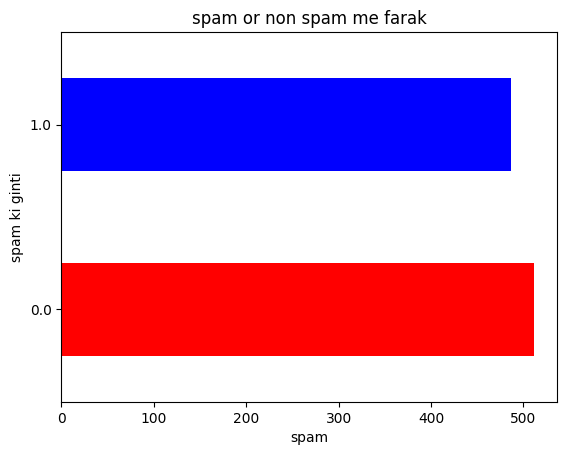

In [19]:
df['is_spam'].value_counts().plot(kind='barh', color=['red', 'blue'])
plt.title('spam or non spam me farak')
plt.xlabel('spam')
plt.ylabel('spam ki ginti')
plt.show()

In [20]:
df['is_spam'].value_counts()


is_spam
0.0    511
1.0    487
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2436ab797f0>,
 [Text(-0.041542317024623424, 1.0992152818698555, 'ham'),
  Text(0.04154215104773308, -1.0992152881425583, 'spam')],
 [Text(-0.02265944564979459, 0.599571971929012, '51.2%'),
  Text(0.022659355116945317, -0.5995719753504862, '48.8%')])

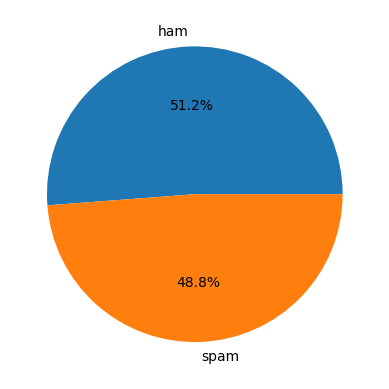

In [21]:
plt.pie(df['is_spam'].value_counts(),labels=['ham', 'spam'],autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2436bc7fd90>,
 [Text(0.4345098312071893, 1.0105450047297746, 'promotional'),
  Text(-1.0804380227940538, -0.20652767102951608, 'transactional'),
  Text(0.616515142069045, -0.9109934574954891, 'personal')],
 [Text(0.23700536247664866, 0.5512063662162406, '37.1%'),
  Text(-0.5893298306149383, -0.11265145692519057, '31.9%'),
  Text(0.3362809865831154, -0.49690552227026674, '31.1%')])

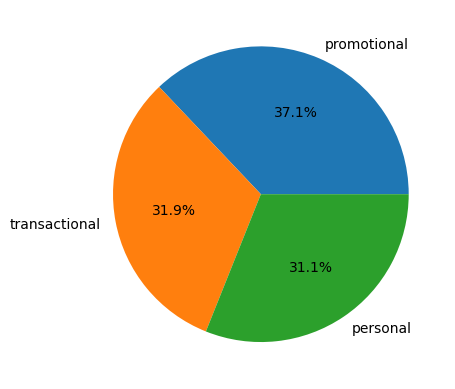

In [25]:
plt.pie(df['category'].value_counts(), labels=['promotional', 'transactional', 'personal'],autopct='%1.1f%%')

In [22]:
# lengtrh nikale char ka
df['msg_char'] = df['message'].apply(len)
df.head()

,message,is_spam,category,msg_char
0,congratulations! you've won a lottery. click h...,0.0,Promotional,63
1,you have a new voicemail. check now.,0.0,Promotional,36
2,congratulations! you've won a lottery. click h...,0.0,Promotional,63
3,you have a new voicemail. check now.,1.0,Promotional,36
4,don't forget mom's birthday this friday.,1.0,Transactional,40


In [23]:
# word tokenize kre msg columns ka
df['msg_word'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,message,is_spam,category,msg_char,msg_word
0,congratulations! you've won a lottery. click h...,0.0,Promotional,63,14
1,you have a new voicemail. check now.,0.0,Promotional,36,9
2,congratulations! you've won a lottery. click h...,0.0,Promotional,63,14
3,you have a new voicemail. check now.,1.0,Promotional,36,9
4,don't forget mom's birthday this friday.,1.0,Transactional,40,9


In [24]:

df['sent_tok'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(10)

,message,is_spam,category,msg_char,msg_word,sent_tok
578,congratulations! you've won a lottery. click h...,1.0,Transactional,63,14,3
994,free recharge on downloading our app. hurry!,1.0,Personal,44,9,2
500,don't forget mom's birthday this friday.,0.0,Transactional,40,9,1
443,don't forget mom's birthday this friday.,0.0,Promotional,40,9,1
215,meeting scheduled at 3 pm tomorrow.,0.0,Promotional,35,7,1
112,congratulations! you've won a lottery. click h...,0.0,Personal,63,14,3
833,meeting scheduled at 3 pm tomorrow.,1.0,Personal,35,7,1
645,don't forget mom's birthday this friday.,0.0,Promotional,40,9,1
634,"limited time loan offer. get 2,00,000 approved...",1.0,Personal,53,10,2
127,"win 1,00,000 by playing ludo. join now!",0.0,Personal,39,9,2


In [29]:
df[['msg_word', 'msg_char', 'sent_tok']].describe()

,msg_word,msg_char,sent_tok
count,998.000000,998.000000,998.000000
mean,10.207415,44.466934,1.774549
std,2.047105,8.359789,0.611060
min,7.000000,35.000000,1.000000
25%,9.000000,39.000000,1.000000
50%,9.000000,40.000000,2.000000
75%,12.000000,52.000000,2.000000
max,14.000000,63.000000,3.000000


In [30]:
df[df['is_spam']==0][['msg_word', 'msg_char', 'sent_tok']].describe()

,msg_word,msg_char,sent_tok
count,511.000000,511.000000,511.000000
mean,10.146771,44.399217,1.772994
std,2.064638,8.543150,0.628829
min,7.000000,35.000000,1.000000
25%,9.000000,39.000000,1.000000
50%,9.000000,40.000000,2.000000
75%,12.000000,52.000000,2.000000
max,14.000000,63.000000,3.000000


In [31]:
df[df['is_spam'] == 1][['msg_word', 'msg_char', 'sent_tok']].describe()

,msg_word,msg_char,sent_tok
count,487.000000,487.000000,487.000000
mean,10.271047,44.537988,1.776181
std,2.028715,8.171144,0.592483
min,7.000000,35.000000,1.000000
25%,9.000000,39.000000,1.000000
50%,9.000000,40.000000,2.000000
75%,12.000000,52.000000,2.000000
max,14.000000,63.000000,3.000000
